## Nama : Tirta Agung Jati
## NIM : 20106050001
## Mata Kuliah : Pembelajaran Mesin
## Tugas NBC 
## Tema Yang Saya Ambil : RESESI 2023
---


In [348]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import classification_report, confusion_matrix
from nltk.tokenize import RegexpTokenizer
import seaborn as sns
import re
import nltk
from textblob import TextBlob

In [349]:
data = pd.read_csv("dataset/dataLatih_v2.csv")

In [350]:
# Jumlah dataset
len(data)

35

In [351]:
data.head()

,Unnamed: 0,Sentence,Sentiment,preprocessing_result
0,0,Masyarakat perlu memahami pengelolaan keuangan...,2,Masyarakat perlu memahami pengelolaan keuangan...
1,1,Saya rasa proyek IKN akan menjadi prasasti yan...,2,Saya rasa proyek IKN menjadi prasasti bersejar...
2,2,Terlepas dari konspirasi ataupun fakta. Resesi...,1,Terlepas dari konspirasi ataupun fakta Resesi ...
3,3,"2023 resesi? Tergantung, kapan si fed nurunin ...",0,2023 resesi Tergantung kapan si fed nurunin su...
4,4,Gubernur Jawa Tengah (Jateng) Ganjar Pranowo t...,2,Gubernur Jawa Tengah Ganjar Pranowo telah meny...


### Text Preprocessing data Latih

In [352]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
factory = StemmerFactory()
stemmer = factory.create_stemmer()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [353]:
listStopword = ['yang', 'untuk', 'pada', 'ke', 'namun', 'menurut', 'antara', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bahwa', 'atau', 'hanya', 'dengan', 'akan', 'juga', 'sudah', 'terhadap', 'secara', 'agar', 'lain', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', 'oh', 'ok', 'seharusnya', 'sebetulnya', 'setiap', 'setidaknya', 'sesuatu', 'pasti', 'saja', 'toh','walau','amat', 'apalagi']

In [354]:
def cleantext(text): 
    text= text.lower()
    text= stemmer.stem(text)
    
    text.strip() 
    text.replace(",","")
    return text

In [355]:
data['preprocessing_result'] = data['preprocessing_result'].apply(lambda x: cleantext(x))

In [356]:
data.head()

,Unnamed: 0,Sentence,Sentiment,preprocessing_result
0,0,Masyarakat perlu memahami pengelolaan keuangan...,2,masyarakat perlu paham kelola uang cara optima...
1,1,Saya rasa proyek IKN akan menjadi prasasti yan...,2,saya rasa proyek ikn jadi prasasti sejarah bag...
2,2,Terlepas dari konspirasi ataupun fakta. Resesi...,1,lepas dari konspirasi atau fakta resesi 2023 m...
3,3,"2023 resesi? Tergantung, kapan si fed nurunin ...",0,2023 resesi gantung kapan si fed nurunin suku ...
4,4,Gubernur Jawa Tengah (Jateng) Ganjar Pranowo t...,2,gubernur jawa tengah ganjar pranowo telah siap...


In [357]:
for i in data['preprocessing_result']:
    print(i)
    print("\n\n")

masyarakat perlu paham kelola uang cara optimal minimalisir dampak mungkin resesi ekonomi



saya rasa proyek ikn jadi prasasti sejarah bagi bangsa indonesia dan dunia sulit wujud bangun ingat 2023 resesi ancam di depan mata apbn gerus bengkak jika proyek ini tetap lanjut imbas jadi inflasi besar



lepas dari konspirasi atau fakta resesi 2023 mudah mudah bisa lewat



2023 resesi gantung kapan si fed nurunin suku bunga akumulasi naikin suku bunga bisa 12 sampai 35 bulan turut historikal data nya di tahun 1980 2000 2008 2020



gubernur jawa tengah ganjar pranowo telah siap strategi untuk hadap potensi krisis pangan pada 2023 akibat resesi ekonomi



ekonomi 2023 gelap resesi phk massal phk yang makin sering jadi



karena beberapa faktor ekonomi banyak negara gagal bayar utang ingat indonesia tetap waspada ancam resesi



moga aja ga resesi 2023



percaya konsumen as turun oktober telah dua naik turut turut di tengah khawatir masyarakat akan inflasi mungkin resesi di 2023



hanya sa

In [358]:
model = MultinomialNB().fit(X_train,y_train)

In [359]:
vectorizer = TfidfVectorizer()
naivebayes = MultinomialNB()

In [360]:
X = vectorizer.fit_transform(data.preprocessing_result)

In [361]:
print(vectorizer)

TfidfVectorizer()


In [362]:
print(X)

  (0, 112)	0.15636144654331297
  (0, 306)	0.0887755277241531
  (0, 239)	0.2567915688863134
  (0, 92)	0.3008978700282338
  (0, 231)	0.3359070107775093
  (0, 260)	0.3359070107775093
  (0, 79)	0.3359070107775093
  (0, 387)	0.2567915688863134
  (0, 179)	0.3359070107775093
  (0, 264)	0.3359070107775093
  (0, 279)	0.3008978700282338
  (0, 225)	0.3008978700282338
  (1, 59)	0.1545051970517163
  (1, 150)	0.16840737195912955
  (1, 145)	0.1880013869901417
  (1, 202)	0.1880013869901417
  (1, 373)	0.1545051970517163
  (1, 153)	0.12100900711329089
  (1, 163)	0.1880013869901417
  (1, 56)	0.1880013869901417
  (1, 133)	0.1880013869901417
  (1, 27)	0.1880013869901417
  (1, 226)	0.1880013869901417
  (1, 100)	0.16840737195912955
  (1, 101)	0.09754694527401969
  :	:
  (34, 203)	0.20408307622383617
  (34, 83)	0.20408307622383617
  (34, 358)	0.20408307622383617
  (34, 298)	0.20408307622383617
  (34, 382)	0.20408307622383617
  (34, 185)	0.20408307622383617
  (34, 392)	0.40816615244767235
  (34, 276)	0.2040830

In [363]:
naivebayes.fit(X, data.Sentiment)

MultinomialNB()

In [364]:
print(naivebayes)

MultinomialNB()


In [365]:
datauji = pd.read_csv("dataset/dataUji_v2.csv")

In [366]:
datauji.head()

,Unnamed: 0,Sentence,Sentiment,preprocessing_result
0,0,aku percaya resesi karena presiden yang bilang...,2,aku percaya resesi karena presiden bilang tapi...
1,1,Ngga khawatir kalo 2023 bakal beneran resesi k...,1,Ngga khawatir kalo 2023 bakal beneran resesi k...
2,2,Kesel banget gue sama influencer2 itu. Jelas2 ...,0,Kesel banget gue sama influencer itu Jelas mem...
3,3,Logikanya emang gitu. Resesi yang harusnya tah...,2,Logikanya emang gitu Resesi harusnya tahun dep...
4,4,Pertumbuhan ekonomi RI melesat jauh menyentuh ...,0,Pertumbuhan ekonomi RI melesat jauh menyentuh ...


In [367]:
sentiment_datauji = []
for i in datauji.Sentiment:
    sentiment_datauji.append(i)

In [368]:
sentiment_datauji

[2, 1, 0, 2, 0, 0, 1, 2, 2, 2]

### Text Preprocessing data Latih

In [369]:
datauji['preprocessing_result'] = datauji['preprocessing_result'].apply(lambda x: cleantext(x))

### Uji hasil training model dengan data uji

In [370]:
sentiment_prediksiNB = []
for i in datauji.preprocessing_result:
    Xtes = vectorizer.transform([i])
    sentiment = naivebayes.predict(Xtes)
    print("Kalimat : ",i)
    print("Sentimen : ",sentiment[0])
    sentiment_prediksiNB.append(sentiment[0])

Kalimat :  aku percaya resesi karena presiden bilang tapi mereka ini lah manfaat ada 2023 belum mulai tapi kayak mereka contoh nyata dari kaya makin kaya seperti utara saat di podcast closdedor
Sentimen :  2
Kalimat :  ngga khawatir kalo 2023 bakal beneran resesi karena udah tahun tahun alami sulit ekonomi
Sentimen :  1
Kalimat :  kesel banget gue sama influencer itu jelas prediksi 2023 resesi world bank situ world bank bilang banyak negara akan mengalamai resesi arti ada sedikit negara tidak kan salah satu negara tidak resesi di 2023 indonesia jadi jangan diplintir tai
Sentimen :  0
Kalimat :  logika emang gitu resesi harus tahun depan malah jadi bisa jadi sekarang sekarang ini untung siapa pol polan terus terus bahas 2023 resesi mereka dah siapin uang cash resesi lebih cepat jadi cash mereka lebih cepat bisa dipake
Sentimen :  2
Kalimat :  tumbuh ekonomi ri lesat jauh sentuh angka 5 koma 3 persen yang nanti hanya turun ke 5 persen pada tahun 2023 salip negara negara besar seperti chi

In [371]:
kalimat_tes = "ga mungkin ini akan terjadi resesi"

In [372]:
Xtes = vectorizer.transform([kalimat_tes])
sentiment = naivebayes.predict(Xtes)

print("Kalimat : ",kalimat_tes)
print("Sentimen : ",sentiment[0])

Kalimat :  ga mungkin ini akan terjadi resesi
Sentimen :  2


In [373]:
sentiment_prediksiNB

[2, 1, 0, 2, 0, 2, 1, 2, 2, 2]

In [374]:
import matplotlib.pyplot as plt
def PieChart(score,labels):
    fig1 = plt.figure();fig1.add_subplot(111)
    plt.pie(score, labels=labels, autopct='%1.1f%%',startangle=140)
    plt.axis('equal');plt.show()
    return None

## Penilaian manual hasil data tes atau data uji

2
1
0
2
0
0
1
2
2
2
[5, 2, 3]


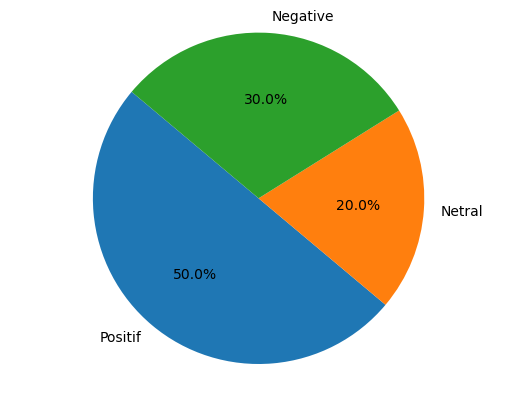

In [375]:
for i in sentiment_datauji:
    print(i)
    score_se = [
        len([True for t in  sentiment_datauji if t == 2]),
        len([True for t in  sentiment_datauji if t == 1]),
        len([True for t in  sentiment_datauji if t == 0])
    ]
print(score_se)
label_se = ['Positif','Netral','Negative']
PieChart(score_se,label_se)

### Hasil Prediksi Naive Bayes

2
1
0
2
0
2
1
2
2
2
[6, 2, 2]


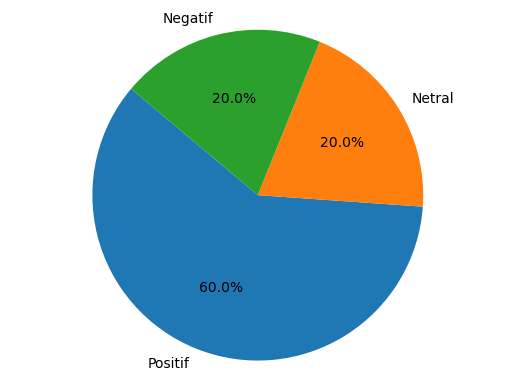

In [376]:
for i in sentiment_prediksiNB:
    print(i)
    score_se2 = [
        len([True for t in  sentiment_prediksiNB if t==2]),
        len([True for t in  sentiment_prediksiNB if t==1]),
        len([True for t in  sentiment_prediksiNB if t==0])
    ]
print(score_se2)
label_se = ['Positif','Netral','Negatif']
PieChart(score_se2,label_se)

## Classification Report Naive Bayes

In [377]:
print('\tClassification Report for Naive Bayes:\n\n',classification_report(sentiment_datauji,sentiment_prediksiNB, target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for Naive Bayes:

               precision    recall  f1-score   support

    Negative       1.00      0.67      0.80         3
     Neutral       1.00      1.00      1.00         2
    Positive       0.83      1.00      0.91         5

    accuracy                           0.90        10
   macro avg       0.94      0.89      0.90        10
weighted avg       0.92      0.90      0.89        10



In [378]:
print('Test accuracy = ', round(accuracy_score(sentiment_datauji,sentiment_prediksiNB), 2))

Test accuracy =  0.9


In [379]:
score = f1_score(sentiment_datauji,sentiment_prediksiNB, average="macro")
print("Macro F1-Score: ", score)

score = f1_score(sentiment_datauji,sentiment_prediksiNB, average="micro")
print("Micro F1-Score: ", score)

score = f1_score(sentiment_datauji,sentiment_prediksiNB, average="weighted")
print("Weighted F1-Score: ", score)

Macro F1-Score:  0.903030303030303
Micro F1-Score:  0.9
Weighted F1-Score:  0.8945454545454545


![](cnf.jpg)

In [380]:
cnf_mat = confusion_matrix(sentiment_datauji,sentiment_prediksiNB)
cnf_mat #confusion_matrix

array([[2, 0, 1],
       [0, 2, 0],
       [0, 0, 5]], dtype=int64)

<AxesSubplot:>

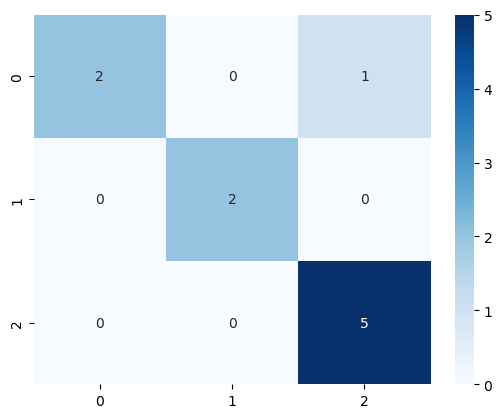

In [381]:
sns.heatmap(cnf_mat, annot = True, fmt = '', cmap = 'Blues')

In [382]:
TP = np.diag(cnf_mat)
TP = TP.astype(float)
FN = cnf_mat.sum(axis = 1) - TP
FN = FN.astype(float)
FP = cnf_mat.sum(axis = 0) - TP 
FP = FP.astype(float)
TN = cnf_mat.sum() - (TP + FN + FP)
TN = TN.astype(float)

# Sensitivity / Recall
TPR = TP/(TP+FN)
# TP / Positif

# Specificity
TNR = TN/(TN+FP) 
# TNR = 1 - FPR atau TN / Negatif

#Precision
FPR = FP/(TN+FP)
# FP / Negatif 

FNR = FN/(TP+FN)
# FNR = 1 - TPR atah FN / Positif

# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

# Classification error
Err = (FP+FN)/(TP+FP+FN+TN)

print('Recall = ', TPR.round(2))
print('Precision = ', FPR.round(2))
print('Accuracy = ', ACC.round(2))
print('Classification error = ', Err.round(2))

Recall =  [0.67 1.   1.  ]
Precision =  [0.  0.  0.2]
Accuracy =  [0.9 1.  0.9]
Classification error =  [0.1 0.  0.1]


## Menggunakan TextBlob

In [383]:
from textblob import TextBlob

## Dataset Latih

In [384]:
Se = []
for tweet in data.preprocessing_result:
    analysis = TextBlob(tweet)
    an = analysis.translate(from_lang='id',to='en')
    Sen = an.sentiment.polarity
    if Sen>0.2:
        Se.append('pos')
    elif Sen<-0.05:
        Se.append('neg')
    else:
        Se.append('net')
print(Se)

['net', 'neg', 'pos', 'net', 'net', 'net', 'net', 'net', 'neg', 'net', 'pos', 'pos', 'neg', 'pos', 'net', 'net', 'net', 'net', 'neg', 'neg', 'neg', 'neg', 'net', 'net', 'net', 'net', 'net', 'neg', 'net', 'net', 'neg', 'pos', 'neg', 'neg', 'net']


In [385]:
import matplotlib.pyplot as plt
def PieChart(score,labels):
    fig1 = plt.figure();fig1.add_subplot(111)
    plt.pie(score, labels=labels, autopct='%1.1f%%',startangle=140)
    plt.axis('equal');plt.show()
    return None

net
neg
pos
net
net
net
net
net
neg
net
pos
pos
neg
pos
net
net
net
net
neg
neg
neg
neg
net
net
net
net
net
neg
net
net
neg
pos
neg
neg
net
[5, 11, 19]


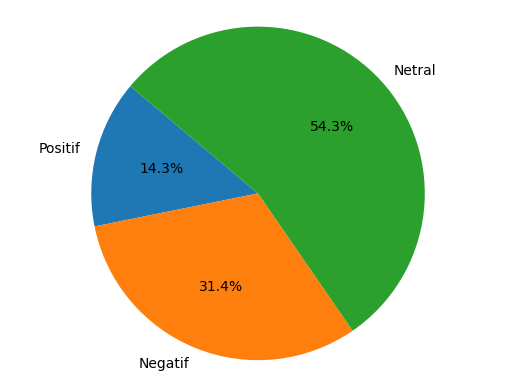

In [386]:
for i in Se:
    print(i)
    score_se = [
        len([True for t in  Se if t=='pos']),
        len([True for t in  Se if t=='neg']),
        len([True for t in  Se if t=='net'])
    ]
print(score_se)
label_se = ['Positif','Negatif','Netral']
PieChart(score_se,label_se)

## Dataset Ujicoba

In [387]:
Se2 = []
for tweet in datauji.preprocessing_result:
    analysis = TextBlob(tweet)
    an = analysis.translate(from_lang='id',to='en')
    Sen = an.sentiment.polarity
    if Sen>0.2:
        Se2.append('pos')
    elif Sen<-0.05:
        Se2.append('neg')
    else:
        Se2.append('net')
print(Se2)

['net', 'net', 'neg', 'net', 'net', 'neg', 'pos', 'neg', 'neg', 'net']


net
net
neg
net
net
neg
pos
neg
neg
net
[1, 4, 5]


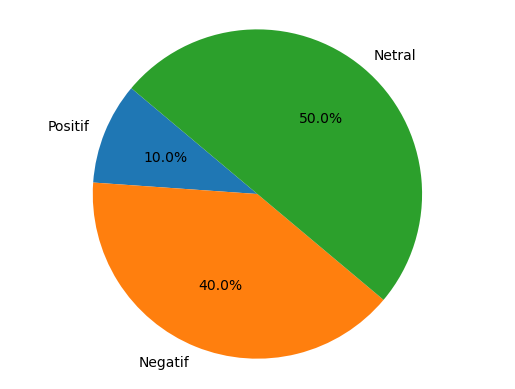

In [388]:
for i in Se2:
    print(i)
    score_se = [
        len([True for t in  Se2 if t=='pos']),
        len([True for t in  Se2 if t=='neg']),
        len([True for t in  Se2 if t=='net'])
    ]
print(score_se)
label_se = ['Positif','Negatif','Netral']
PieChart(score_se,label_se)

### Mencoba dengan kalimat atau sentence pada data di stemming menggunakan library python
naive bayes classifier

In [389]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [390]:
hasil_stemming_data_latih = []
for i in data.preprocessing_result:
    hasil = stemmer.stem(i)
    hasil_stemming_data_latih.append(hasil)

In [391]:
hasil_stemming_data_latih

['masyarakat perlu paham kelola uang cara optimal minimalisir dampak mungkin resesi ekonomi',
 'saya rasa proyek ikn jadi prasasti sejarah bagi bangsa indonesia dan dunia sulit wujud bangun ingat 2023 resesi ancam di depan mata apbn gerus bengkak jika proyek ini tetap lanjut imbas jadi inflasi besar',
 'lepas dari konspirasi atau fakta resesi 2023 mudah mudah bisa lewat',
 '2023 resesi gantung kapan si fed nurunin suku bunga akumulasi naikin suku bunga bisa 12 sampai 35 bulan turut historikal data nya di tahun 1980 2000 2008 2020',
 'gubernur jawa tengah ganjar pranowo telah siap strategi untuk hadap potensi krisis pangan pada 2023 akibat resesi ekonomi',
 'ekonomi 2023 gelap resesi phk massal phk yang makin sering jadi',
 'karena beberapa faktor ekonomi banyak negara gagal bayar utang ingat indonesia tetap waspada ancam resesi',
 'moga aja ga resesi 2023',
 'percaya konsumen as turun oktober telah dua naik turut turut di tengah khawatir masyarakat akan inflasi mungkin resesi di 2023',

In [392]:
data_latih2 = {'hasil_stem':hasil_stemming_data_latih,'sentiment':data.Sentiment}
data_latih2 = pd.DataFrame(data=data_latih2)
print(data_latih2)

                                           hasil_stem  sentiment
0   masyarakat perlu paham kelola uang cara optima...          2
1   saya rasa proyek ikn jadi prasasti sejarah bag...          2
2   lepas dari konspirasi atau fakta resesi 2023 m...          1
3   2023 resesi gantung kapan si fed nurunin suku ...          0
4   gubernur jawa tengah ganjar pranowo telah siap...          2
5   ekonomi 2023 gelap resesi phk massal phk yang ...          2
6   karena beberapa faktor ekonomi banyak negara g...          2
7                             moga aja ga resesi 2023          1
8   percaya konsumen as turun oktober telah dua na...          2
9   hanya satu tips hadap kondisi ekonomi 2023 ban...          1
10  moga indonesia benar benar selamat dari resesi...          1
11  tak ada resesi bagi rakyat banyak orang daya b...          0
12  masih takut tahun 2023 resesi kita udah pernah...          0
13  bener atau engga 2023 resesi yang penting udah...          1
14  mungkin bisa jadi res

In [393]:
hasil_stemming_data_uji = []
for i in datauji.preprocessing_result:
    hasil = stemmer.stem(i)
    hasil_stemming_data_uji.append(hasil)

In [394]:
hasil_stemming_data_uji

['aku percaya resesi karena presiden bilang tapi mereka ini lah manfaat ada 2023 belum mulai tapi kayak mereka contoh nyata dari kaya makin kaya seperti utara saat di podcast closdedor',
 'ngga khawatir kalo 2023 bakal beneran resesi karena udah tahun tahun alami sulit ekonomi',
 'kesel banget gue sama influencer itu jelas prediksi 2023 resesi world bank situ world bank bilang banyak negara akan mengalamai resesi arti ada sedikit negara tidak kan salah satu negara tidak resesi di 2023 indonesia jadi jangan diplintir tai',
 'logika emang gitu resesi harus tahun depan malah jadi bisa jadi sekarang sekarang ini untung siapa pol polan terus terus bahas 2023 resesi mereka dah siapin uang cash resesi lebih cepat jadi cash mereka lebih cepat bisa dipake',
 'tumbuh ekonomi ri lesat jauh sentuh angka 5 koma 3 persen yang nanti hanya turun ke 5 persen pada tahun 2023 salip negara negara besar seperti china dan amerika eropa saja turun dari 3 koma 1 persen ke 0 koma 5 persen indonesia bebas reses

In [395]:
data_uji2 = {'hasil_stem':hasil_stemming_data_uji}
data_uji2 = pd.DataFrame(data=data_uji2)
print(data_uji2)

                                          hasil_stem
0  aku percaya resesi karena presiden bilang tapi...
1  ngga khawatir kalo 2023 bakal beneran resesi k...
2  kesel banget gue sama influencer itu jelas pre...
3  logika emang gitu resesi harus tahun depan mal...
4  tumbuh ekonomi ri lesat jauh sentuh angka 5 ko...
5  nah konten dia bikin orang takut resesi milih ...
6  alhamdulillah siap resesi 2023 sudah beli bida...
7  bikin resesi ya takut orang tentang resesi bis...
8  2023 lebih parah karena bakal ada krisis ekono...
9  saya tegas kembali betapa penting peran umkm u...


In [396]:
X2 = vectorizer.fit_transform(data_latih2.hasil_stem)

In [397]:
mlnb = naivebayes.fit(X2, data_latih2.sentiment)

In [398]:
nilaiakhir = []
for i in data_uji2.hasil_stem:
    Xtes = vectorizer.transform([i])
    sentiment = mlnb.predict(Xtes)
    print("Kalimat : ",i)
    print("Sentimen : ",sentiment[0])
    nilaiakhir.append(sentiment[0])

Kalimat :  aku percaya resesi karena presiden bilang tapi mereka ini lah manfaat ada 2023 belum mulai tapi kayak mereka contoh nyata dari kaya makin kaya seperti utara saat di podcast closdedor
Sentimen :  2
Kalimat :  ngga khawatir kalo 2023 bakal beneran resesi karena udah tahun tahun alami sulit ekonomi
Sentimen :  1
Kalimat :  kesel banget gue sama influencer itu jelas prediksi 2023 resesi world bank situ world bank bilang banyak negara akan mengalamai resesi arti ada sedikit negara tidak kan salah satu negara tidak resesi di 2023 indonesia jadi jangan diplintir tai
Sentimen :  0
Kalimat :  logika emang gitu resesi harus tahun depan malah jadi bisa jadi sekarang sekarang ini untung siapa pol polan terus terus bahas 2023 resesi mereka dah siapin uang cash resesi lebih cepat jadi cash mereka lebih cepat bisa dipake
Sentimen :  2
Kalimat :  tumbuh ekonomi ri lesat jauh sentuh angka 5 koma 3 persen yang nanti hanya turun ke 5 persen pada tahun 2023 salip negara negara besar seperti chi

2
1
0
2
0
2
1
2
2
2
[6, 2, 2]


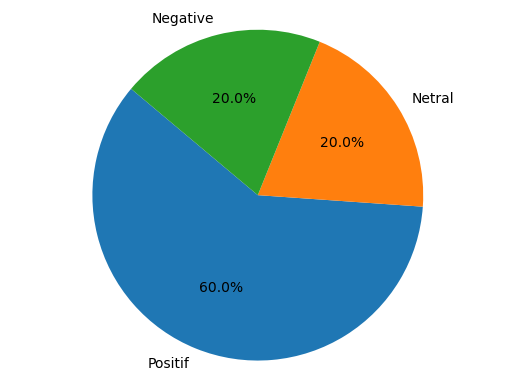

In [399]:
for i in nilaiakhir:
    print(i)
    score_se = [
        len([True for t in  nilaiakhir if t==2]),
        len([True for t in  nilaiakhir if t==1]),
        len([True for t in  nilaiakhir if t==0])
    ]
print(score_se)
label_se = ['Positif','Netral','Negative']
PieChart(score_se,label_se)

### Mengikuti pdf Confussion-Matrix-hasil-modelling yang diberi di wa

In [400]:
count_vect = CountVectorizer()
countsv = count_vect.fit_transform(data['preprocessing_result'])

In [401]:
transformer = TfidfTransformer().fit(countsv)
countsv = transformer.transform(countsv)

In [431]:
X_train, X_test, y_train, y_test = train_test_split(countsv,data['Sentiment'], test_size=0.2, random_state=69)

In [432]:
predicted = model.predict(X_test)
skorcfm = np.mean(predicted == y_test)
print(skorcfm)

1.0


In [433]:
print(confusion_matrix(y_test, predicted))

[[1 0 0]
 [0 2 0]
 [0 0 4]]


In [434]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

In [435]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
            yticks=np.arange(cm.shape[0]),
            # ... and label them with the respective list entries
            xticklabels=classes, yticklabels=classes,
            title=title,
            ylabel='True label',
            xlabel='Predicted label')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[1 0 0]
 [0 2 0]
 [0 0 4]]


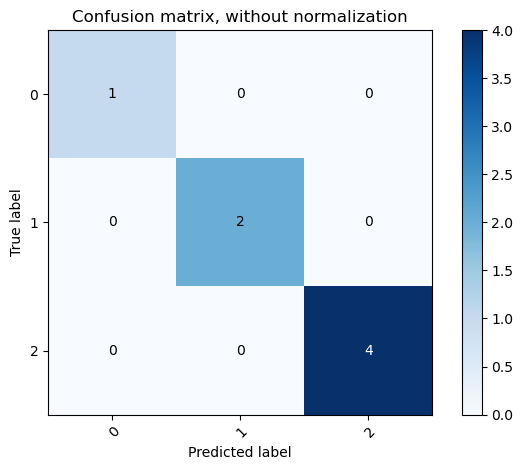

In [436]:
np.set_printoptions(precision=2)

dff = np.array(('0','1','2'),dtype='U10') 

plot_confusion_matrix(y_test, predicted, classes=dff,title='Confusion matrix, without normalization')

plt.show()

Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


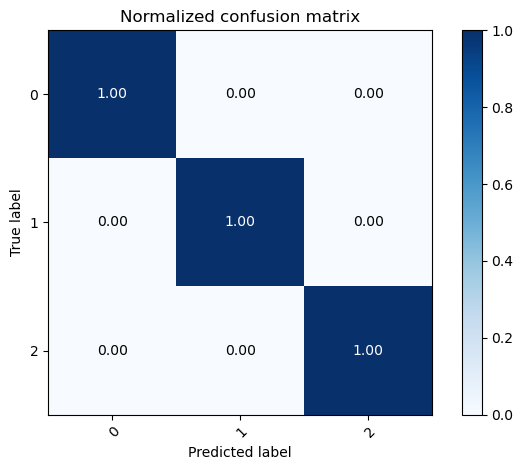

In [437]:
plot_confusion_matrix(y_test, predicted, classes=dff, normalize=True, title='Normalized confusion matrix')

plt.show()

In [438]:
 # Accuracy
from sklearn.metrics import accuracy_score
#accuracy_score(y_true, y_pred)
print("Accuracy Score : ",accuracy_score(y_test, predicted))

Accuracy Score :  1.0


In [439]:
# Recall
from sklearn.metrics import recall_score
#recall_score(y_true, y_pred, average=None)
print(recall_score(y_test, predicted, average=None))

[1. 1. 1.]


In [440]:
 # Precision
from sklearn.metrics import precision_score
#precision_score(y_true, y_pred, average=None)
print(precision_score(y_test, predicted, average=None))

[1. 1. 1.]


In [441]:
from sklearn.metrics import classification_report
#print (classification_report(y_test, y_pred))
print ("Classification Report : \n",classification_report(y_test, predicted))

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         4

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



# TXT Summarization

In [442]:
from gensim.summarization import summarize
from gensim.summarization import keywords

In [443]:
text_positif = []
text_netral = []
text_negative = []
for i in range(len(data)):
    if data.Sentiment[i] == 1:
        text_netral.append(data.preprocessing_result[i])
    elif data.Sentiment[i] == 2:
        text_positif.append(data.preprocessing_result[i])
    else:
        text_negative.append(data.preprocessing_result[i])

In [444]:
text_positif = '. '.join(text_positif)
text_netral = '. '.join(text_netral)
text_negative = '. '.join(text_negative)

In [445]:
tsum1 = summarize(text_positif, split=True)
tsum2 = summarize(text_netral, split=True)
tsum3 = summarize(text_negative, split=True)

In [446]:
print("Berikut Summarize kalimat kalimat yang ada pada sentimen positif : ",tsum1)

Berikut Summarize kalimat kalimat yang ada pada sentimen positif :  ['saya rasa proyek ikn jadi prasasti sejarah bagi bangsa indonesia dan dunia sulit wujud bangun ingat 2023 resesi ancam di depan mata apbn gerus bengkak jika proyek ini tetap lanjut imbas jadi inflasi besar.', 'ingat saja 2023 mulai resesi dunia sangat berat buat ekonomi indonesia 2023 sampai 2028 siap siap untuk siklus masa 5 tahun jadi jangan buang uang gak perlu.', '2023 lebih parah karena bakal ada krisis ekonomi dunia efek dari pandemi kemarin kalo liat dari ekonomi indonesia sekarang mungkin besar indo bakal kena resesi.']


In [447]:
print("Berikut Summarize kalimat kalimat yang ada pada sentimen netral : ",tsum2)

Berikut Summarize kalimat kalimat yang ada pada sentimen netral :  ['bener atau engga 2023 resesi yang penting udah prepare toh gak rugi juga prepare duit dari sekarang.', 'ngga khawatir kalo 2023 bakal beneran resesi karena udah tahun tahun alami sulit ekonomi.']


In [448]:
print("Berikut Summarize kalimat kalimat yang ada pada sentimen negative : ",tsum3)

Berikut Summarize kalimat kalimat yang ada pada sentimen negative :  ['2023 masih lama nder resesi itu kalo 2 kuartal 6 bulan tumbuh minus turut turut jadi ada waktu buat nyontek liat kapan resesi mulai belum lagi indonesia biasa telat kayak 2020 lalu yang lain awal tahun dah pada ambruk kita tengah tahun baru ambruk.']


In [449]:
print("Berikut Keyword kalimat kalimat yang ada pada sentimen positif : ", keywords(text_positif).split("\n"))

Berikut Keyword kalimat kalimat yang ada pada sentimen positif :  ['jadi', 'dampak mungkin resesi', 'ekonomi saya', 'karena', 'mereka', 'bilang', 'ini tetap', 'dari', 'indonesia', 'uang', 'dunia', 'ada', 'harga', 'terus', 'sudah', 'tidak', 'ingat', 'kondisi', 'untuk', 'gak', 'lebih', 'market', 'orang', 'generasi', 'buat', 'proyek', 'tahun', 'perlu', 'krisis', 'percaya', 'pas', 'besar', 'telah', 'bikin', 'mulai', 'bakal', 'anjlok', 'buyer']


In [450]:
print("Berikut Keyword kalimat kalimat yang ada pada sentimen netral : ", keywords(text_netral).split("\n"))

Berikut Keyword kalimat kalimat yang ada pada sentimen netral :  ['resesi', 'moga aja', 'ekonomi', 'dari', 'bisa', 'kalo', 'mau', 'hadap', 'yang', 'udah prepare', 'atau', 'bakal', 'aman', 'karena kita', 'jadi', 'segera']


In [451]:
print("Berikut Keyword kalimat kalimat yang ada pada sentimen negative : ", keywords(text_negative).split("\n"))

Berikut Keyword kalimat kalimat yang ada pada sentimen negative :  ['resesi', 'tahun', 'indonesia itu', 'negara', 'masih takut', 'bisnis', 'dengan', 'ekonomi minus', 'tak ada', 'mereka', 'influencer', 'jadi', 'yang', 'dari', 'kita udah', 'koma', 'banyak orang', 'suku bunga', 'persen', 'tumbuh', 'bulan turut', 'pada', 'tidak', 'turun', 'dan', 'politika', 'jauh']


## Wordcloud

In [452]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

<function matplotlib.pyplot.show(close=None, block=None)>

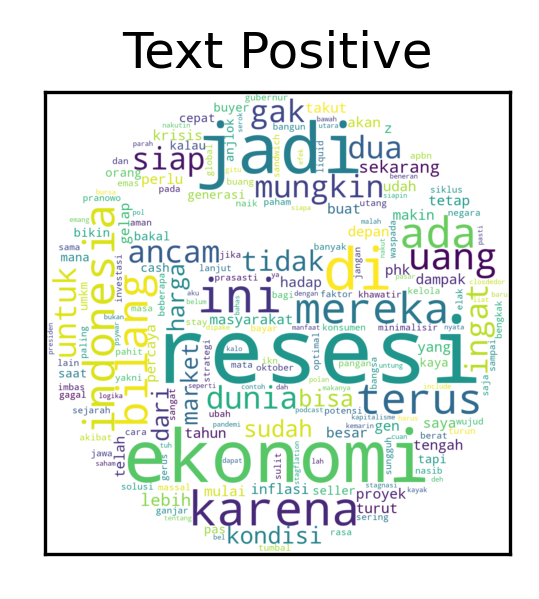

In [453]:
wave_mask = np.array(Image.open("bulat.png"))
wordcloud = WordCloud(background_color="white",mask=wave_mask).generate(text_positif)
plt.figure(num=1,facecolor='w',edgecolor='k',figsize=(2,2),dpi=300)
plt.imshow(wordcloud,interpolation="bilinear",aspect="auto");plt.xticks(());plt.yticks(())
plt.margins(x=0,y=0)
plt.title('Text Positive')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

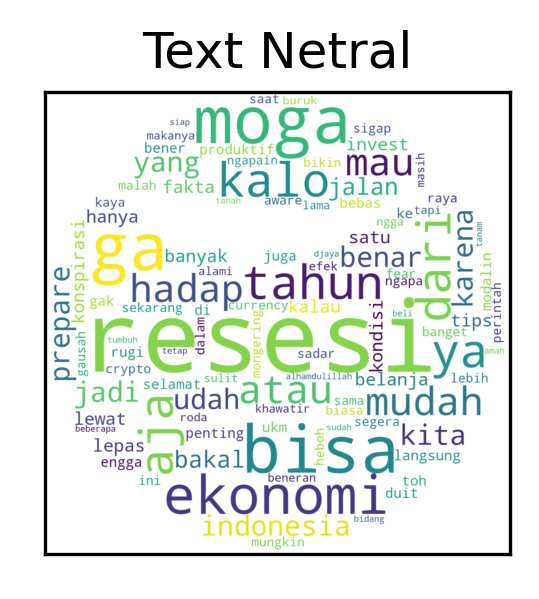

In [454]:
wave_mask = np.array(Image.open("bulat.png"))
wordcloud = WordCloud(background_color="white",mask=wave_mask).generate(text_netral)
plt.figure(num=1,facecolor='w',edgecolor='k',figsize=(2,2),dpi=300)
plt.imshow(wordcloud,interpolation="bilinear",aspect="auto");plt.xticks(());plt.yticks(())
plt.margins(x=0,y=0)
plt.title('Text Netral')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

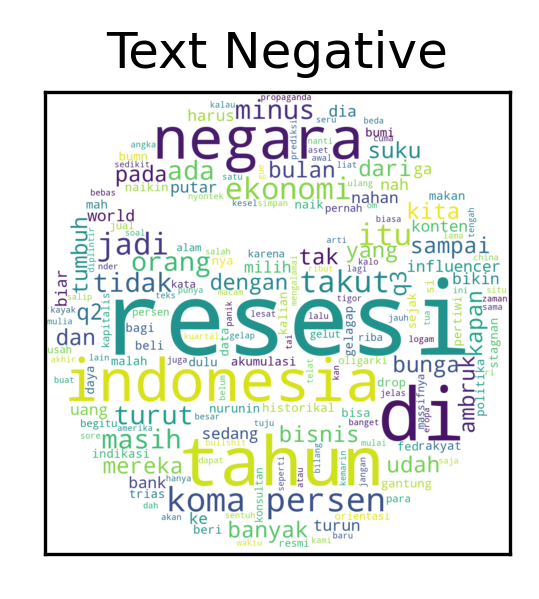

In [455]:
wave_mask = np.array(Image.open("bulat.png"))
wordcloud = WordCloud(background_color="white",mask=wave_mask).generate(text_negative)
plt.figure(num=1,facecolor='w',edgecolor='k',figsize=(2,2),dpi=300)
plt.imshow(wordcloud,interpolation="bilinear",aspect="auto");plt.xticks(());plt.yticks(())
plt.margins(x=0,y=0)
plt.title('Text Negative')
plt.show